In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ast
from hans_prediction import *
from tqdm import tqdm, trange

# Seed 42

## mnli

In [2]:
mnli_eval_acc = [70.99337, 74.51859, 76.48497, 77.46306, 78.22720, 
                 78.90983, 79.21548, 79.71472, 79.88792, 80.11207]
mnli_mm_eval_acc = [72.95565, 76.38323, 77.87835, 78.55980, 78.88527, 
                    79.69894, 79.99735, 80.29902, 80.66514, 81.16354]
data_pct = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

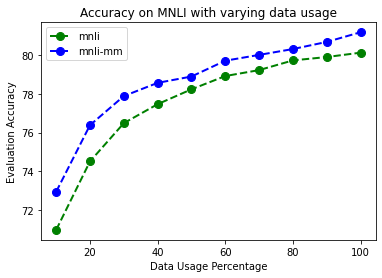

In [3]:
plt.plot(data_pct, mnli_eval_acc, color='green', marker='o', 
         linestyle='dashed',linewidth=2, markersize=8, label='mnli')
plt.plot(data_pct, mnli_mm_eval_acc, color='blue', marker='o', 
         linestyle='dashed',linewidth=2, markersize=8, label='mnli-mm')
plt.xlabel('Data Usage Percentage')
plt.ylabel('Evaluation Accuracy')
plt.title('Accuracy on MNLI with varying data usage')
plt.legend()
plt.savefig('/home/nlp/transformers-importance-sampling/figs/mnli_graph.png')

In [4]:
hans_entailed_lexical = [0.0196, 0.1626, 0.1046, 0.276, 0.0596, 0.0192, 
                 0.0788, 0.1324, 0.4688, 0.0562]
hans_entailed_subsequence = [0.0146, 0.0956, 0.0866, 0.2222, 0.044,
                            0.021, 0.0592, 0.159, 0.377, 0.0552]
hans_entailed_constituent = [0.0118, 0.0866, 0.1164, 0.1364, 0.042,
                            0.0184, 0.056, 0.1278, 0.4382,  0.028]
hans_non_entailed_lexical = [0.9776, 0.8396, 0.9012, 0.7572, 0.9548,
                            0.984, 0.9466, 0.9168, 0.5936, 0.9782]
hans_non_entailed_subsequence = [0.9858, 0.862, 0.8958, 0.775, 0.9498,
                                 0.9786, 0.934, 0.8788, 0.5972, 0.9684]
hans_non_entailed_constituent = [0.991, 0.9364, 0.9098, 0.9138, 0.98,
                                0.9926, 0.974, 0.9502, 0.7106, 0.9904]

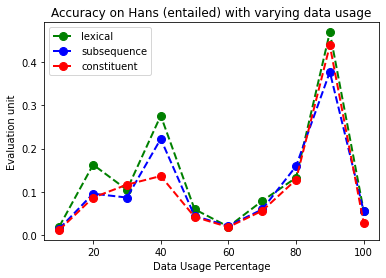

In [5]:
plt.plot(data_pct, hans_entailed_lexical, color='green', marker='o', 
         linestyle='dashed',linewidth=2, markersize=8, label='lexical')
plt.plot(data_pct, hans_entailed_subsequence, color='blue', marker='o', 
         linestyle='dashed',linewidth=2, markersize=8, label='subsequence')
plt.plot(data_pct, hans_entailed_constituent, color='red', marker='o', 
         linestyle='dashed',linewidth=2, markersize=8, label='constituent')
plt.xlabel('Data Usage Percentage')
plt.ylabel('Evaluation unit')
plt.title('Accuracy on Hans (entailed) with varying data usage')
plt.legend()
plt.savefig('/home/nlp/transformers-importance-sampling/figs/hans_entailed.png')

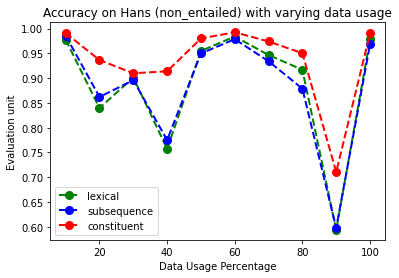

In [6]:
plt.plot(data_pct, hans_non_entailed_lexical, color='green', marker='o', 
         linestyle='dashed',linewidth=2, markersize=8, label='lexical')
plt.plot(data_pct, hans_non_entailed_subsequence, color='blue', marker='o', 
         linestyle='dashed',linewidth=2, markersize=8, label='subsequence')
plt.plot(data_pct, hans_non_entailed_constituent, color='red', marker='o', 
         linestyle='dashed',linewidth=2, markersize=8, label='constituent')
plt.xlabel('Data Usage Percentage')
plt.ylabel('Evaluation unit')
plt.title('Accuracy on Hans (non_entailed) with varying data usage')
plt.legend()
plt.savefig('/home/nlp/transformers-importance-sampling/figs/hans_non_entailed.png')

# Different seeds

## Mnli

In [7]:
mnli_eval_acc_0 = [70.95262, 74.33550, 76.54610, 77.51400, 78.17626, 78.72643,
                  79.12379, 80.57363, 80.06113, 80.15282]
mnli_mm_eval_acc_0 = [72.32506, 75.66110, 77.35964, 77.94955, 79.12937, 79.78030,
                     79.91253, 79.51095, 80.72620, 81.01098]
mnli_eval_acc_250 = [69.81151, 73.89709, 75.62913, 77.00458, 77.70759, 78.32908,
                    78.93020, 79.22567, 79.52114, 80.08150]
mnli_mm_eval_acc_250 = [72.11147, 75.23393, 77.12571, 78.19365, 78.82424, 79.40398,
                        79.93287, 80.31936, 80.72620, 80.97030]
mnli_eval_acc_500 = [70.70809, 74.28425,  76.42384, 77.25929, 78.12531, 78.50229, 78.71625,
                       79.21548, 79.44982, 80.99064]
mnli_mm_eval_acc_500 = [72.20301, 75.91537, 76.89178, 78.24450, 79.01749, 79.66842, 79.96338,
                       80.41090, 80.80756, 80.08150]
mnli_eval_acc_999 = [69.89302, 74.83443, 76.51553, 77.46306, 78.17626, 78.31889, 79.26642,
                     79.62302, 79.78604, 80.08150]
mnli_mm_eval_acc_999 = [71.8063, 75.86452, 77.39015, 78.29536, 79.12937, 78.98698, 80.13628,
                       80.17697, 80.52278, 80.97030]

In [8]:
hans_entailed_lexical_0 = [0.0048, 0.1428, 0.0002, 0.1078, 0.0596, 0.0106, 
                           0.1354, 0.0738, 0.3278, 0.3004]
hans_entailed_subsequence_0 = [0.0024, 0.082, 0.0002, 0.1, 0.044, 0.0076, 
                               0.2012, 0.1196, 0.3198, 0.3478]
hans_entailed_constituent_0 = [0.002, 0.088, 0.0, 0.0846, 0.042, 0.0062, 
                               0.2452, 0.128, 0.3194, 0.2982]
hans_non_entailed_lexical_0 = [0.9946, 0.8522, 1.0, 0.8782, 0.9548, 0.993, 
                               0.876, 0.932, 0.7384, 0.7402]
hans_non_entailed_subsequence_0 = [0.9772, 0.8982, 0.9988, 0.9128, 0.9498, 
                                   0.991, 0.8294, 0.891, 0.6798, 0.679]
hans_non_entailed_constituent_0 = [0.9992, 0.9334, 0.9996, 0.952, 0.98, 0.9984,
                                   0.817, 0.9374, 0.8228, 0.802]

hans_entailed_lexical_250 = [0.0, 0.0, 0.0, 0.0072, 0.0248, 0.0014, 0.0178, 
                             0.0034, 0.01, 0.057]
hans_entailed_subsequence_250 = [0.0, 0.0, 0.0, 0.0104, 0.1366, 0.009, 0.0302,
                                 0.0216, 0.0686, 0.2076] 
hans_entailed_constituent_250 = [0.0, 0.0002, 0.0, 0.0234, 0.1344, 0.0284, 0.0384,
                                 0.0258, 0.0612, 0.2072]
hans_non_entailed_lexical_250 = [1.0, 1.0, 1.0, 0.9952, 0.9832, 0.9986, 0.991, 
                                 0.9986, 0.9938, 0.9288]
hans_non_entailed_subsequence_250 = [1.0, 1.0, 1.0, 0.9974, 0.9526, 0.9924, 0.9876,
                                     0.9934, 0.9972, 0.924]
hans_non_entailed_constituent_250 = [1.0, 1.0, 1.0, 0.9938, 0.9454, 0.9886, 0.9842,
                                     0.9872, 0.9776, 0.8946]

hans_entailed_lexical_500 = [0.0002, 0.0, 0.0, 0.0122, 0.0, 0.0008, 0.0, 
                             0.0052, 0.001, 0.0]
hans_entailed_subsequence_500 = [0.0, 0.0, 0.0, 0.0384, 0.0, 0.0016, 0.0008, 
                                 0.0056, 0.0044, 0.001]
hans_entailed_constituent_500 = [0.0006, 0.0 , 0.0, 0.026, 0.0, 0.0004, 
                                 0.0008, 0.0024, 0.0034, 0.0032]
hans_non_entailed_lexical_500 = [1.0, 1.0, 1.0, 0.997, 1.0, 1.0, 1.0, 0.9996,
                                 0.9998, 1.0,]
hans_non_entailed_subsequence_500 = [1.0, 1.0, 1.0, 0.9804, 1.0, 1.0, 1.0, 
                                     0.9978, 0.9996, 1.0,]
hans_non_entailed_constituent_500 = [0.9998, 1.0, 1.0, 0.997, 1.0, 1.0, 1.0, 
                                     0.9994, 0.9998, 1.0]

hans_entailed_lexical_999 = [0.1554, 0.002, 0.0292, 0.0046, 0.1234, 0.3334, 
                             0.0808, 0.0016, 0.0286, 0.0222]
hans_entailed_subsequence_999 = [0.1184, 0.0004, 0.0068, 0.0178, 0.095, 
                                 0.3696, 0.0562, 0.001, 0.021, 0.0126]
hans_entailed_constituent_999 = [0.018, 0.0148, 0.0116, 0.0024, 0.0834, 
                                 0.3784, 0.0972, 0.0046, 0.015, 0.0162]
hans_non_entailed_lexical_999 = [0.796, 0.9976, 0.9794, 0.9988, 0.9014, 
                                 0.6332, 0.929, 0.9988, 0.9742, 0.9896]
hans_non_entailed_subsequence_999 = [0.9372, 0.9982, 0.9872,  0.9976, 0.8958, 
                                     0.6704, 0.9264, 0.9986, 0.97, 0.9866]
hans_non_entailed_constituent_999 = [0.9906, 0.9906, 0.99, 0.9992, 0.9494, 0.7084, 
                                     0.9278, 0.9932, 0.9864, 0.9894]

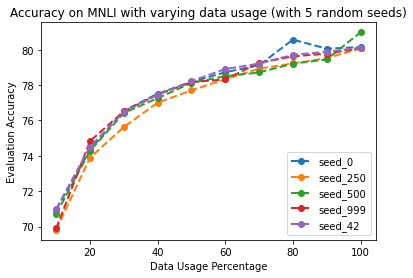

In [9]:
plt.plot(data_pct, mnli_eval_acc_0, marker='o', 
         linestyle='dashed',linewidth=2, markersize=6, label='seed_0')
plt.plot(data_pct, mnli_eval_acc_250, marker='o', 
         linestyle='dashed',linewidth=2, markersize=6, label='seed_250')
plt.plot(data_pct, mnli_eval_acc_500, marker='o', 
         linestyle='dashed',linewidth=2, markersize=6, label='seed_500')
plt.plot(data_pct, mnli_eval_acc_999, marker='o', 
         linestyle='dashed',linewidth=2, markersize=6, label='seed_999')
plt.plot(data_pct, mnli_eval_acc, marker='o', 
         linestyle='dashed',linewidth=2, markersize=6, label='seed_42')
plt.xlabel('Data Usage Percentage')
plt.ylabel('Evaluation Accuracy')
plt.title('Accuracy on MNLI with varying data usage (with 5 random seeds)')
plt.legend()
plt.savefig('/home/nlp/transformers-importance-sampling/figs/mnli_seeds_graph.png')

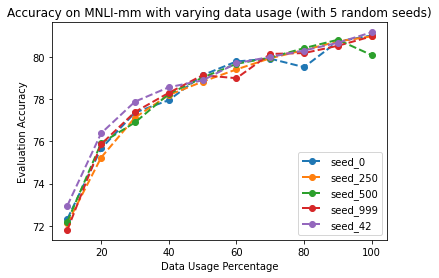

In [10]:
plt.plot(data_pct, mnli_mm_eval_acc_0, marker='o', 
         linestyle='dashed',linewidth=2, markersize=6, label='seed_0')
plt.plot(data_pct, mnli_mm_eval_acc_250, marker='o', 
         linestyle='dashed',linewidth=2, markersize=6, label='seed_250')
plt.plot(data_pct, mnli_mm_eval_acc_500, marker='o', 
         linestyle='dashed',linewidth=2, markersize=6, label='seed_500')
plt.plot(data_pct, mnli_mm_eval_acc_999, marker='o', 
         linestyle='dashed',linewidth=2, markersize=6, label='seed_999')
plt.plot(data_pct, mnli_mm_eval_acc, marker='o', 
         linestyle='dashed',linewidth=2, markersize=6, label='seed_42')
plt.xlabel('Data Usage Percentage')
plt.ylabel('Evaluation Accuracy')
plt.title('Accuracy on MNLI-mm with varying data usage (with 5 random seeds)')
plt.legend()
plt.savefig('/home/nlp/transformers-importance-sampling/figs/mnli_mm_seeds_graph.png')

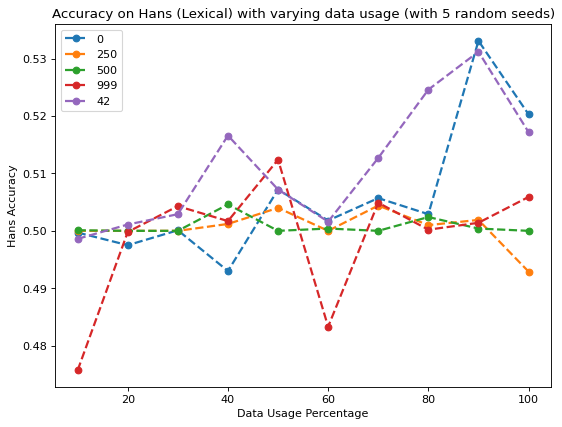

In [11]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

hans_combined_lexical_0 =  (np.array(hans_entailed_lexical_0) +  np.array(hans_non_entailed_lexical_0)) / 2
    
plt.plot(data_pct, hans_combined_lexical_0, marker='o',
          linestyle='dashed',linewidth=2, markersize=6, label='0')    

hans_combined_lexical_250 =  (np.array(hans_entailed_lexical_250) +  np.array(hans_non_entailed_lexical_250)) / 2

plt.plot(data_pct, hans_combined_lexical_250, marker='o', 
         linestyle='dashed',linewidth=2, markersize=6, label='250')

hans_combined_lexical_500 =  (np.array(hans_entailed_lexical_500) +  np.array(hans_non_entailed_lexical_500)) / 2
plt.plot(data_pct, hans_combined_lexical_500, marker='o', 
         linestyle='dashed',linewidth=2, markersize=6, label='500')


hans_combined_lexical_999 =  (np.array(hans_entailed_lexical_999) +  np.array(hans_non_entailed_lexical_999)) / 2
plt.plot(data_pct, hans_combined_lexical_999, marker='o', 
         linestyle='dashed',linewidth=2, markersize=6, label='999')

hans_combined_lexical_42 =  (np.array(hans_entailed_lexical) +  np.array(hans_non_entailed_lexical)) / 2
plt.plot(data_pct, hans_combined_lexical_42, marker='o', 
         linestyle='dashed',linewidth=2, markersize=6, label='42')


plt.xlabel('Data Usage Percentage')
plt.ylabel('Hans Accuracy')
plt.title('Accuracy on Hans (Lexical) with varying data usage (with 5 random seeds)')
plt.legend()
plt.savefig('/home/nlp/transformers-importance-sampling/figs/hans_entailed_seeds_graph.png')

In [12]:
lexical_mean_vals, subsequence_mean_vals, \
constituent_mean_vals = [], [], []

lexical_std_vals, subsequence_std_vals, \
constituent_std_vals = [], [], []

hans_combined_lexical_0 =  (np.array(hans_entailed_lexical_0) +  np.array(hans_non_entailed_lexical_0)) / 2
hans_combined_lexical_250 =  (np.array(hans_entailed_lexical_250) +  np.array(hans_non_entailed_lexical_250)) / 2
hans_combined_lexical_500 =  (np.array(hans_entailed_lexical_500) +  np.array(hans_non_entailed_lexical_500)) / 2
hans_combined_lexical_999 =  (np.array(hans_entailed_lexical_999) +  np.array(hans_non_entailed_lexical_999)) / 2
hans_combined_lexical_42 =  (np.array(hans_entailed_lexical) +  np.array(hans_non_entailed_lexical)) / 2

for i in range(len(data_pct)):
    mean_val = np.mean([hans_combined_lexical_0[i],
                       hans_combined_lexical_250[i],
                       hans_combined_lexical_500[i],
                       hans_combined_lexical_999[i],
                       hans_combined_lexical_42[i]])
    std_val = np.std(([hans_combined_lexical_0[i],
                       hans_combined_lexical_250[i],
                       hans_combined_lexical_500[i],
                       hans_combined_lexical_999[i],
                       hans_combined_lexical_42[i]]))
    lexical_mean_vals.append(mean_val)
    lexical_std_vals.append(std_val)

In [13]:
hans_combined_subsequence_0 = (np.array(hans_entailed_subsequence_0) + np.array(hans_non_entailed_subsequence_0)) / 2
hans_combined_subsequence_250 = (np.array(hans_entailed_subsequence_250) + np.array(hans_non_entailed_subsequence_250)) / 2
hans_combined_subsequence_999 = (np.array(hans_entailed_subsequence_999) + np.array(hans_non_entailed_subsequence_999)) / 2
hans_combined_subsequence_500 = (np.array(hans_entailed_subsequence_500) + np.array(hans_non_entailed_subsequence_500)) / 2
hans_combined_subsequence_42 = (np.array(hans_entailed_subsequence) + np.array(hans_non_entailed_subsequence)) / 2

for i in range(len(data_pct)):
    mean_val = np.mean([hans_combined_subsequence_0[i],
                       hans_combined_subsequence_250[i],
                       hans_combined_subsequence_500[i],
                       hans_combined_subsequence_999[i],
                       hans_combined_subsequence_42[i]])
    std_val = np.std([hans_combined_subsequence_0[i],
                       hans_combined_subsequence_250[i],
                       hans_combined_subsequence_500[i],
                       hans_combined_subsequence_999[i],
                       hans_combined_subsequence_42[i]])
    subsequence_mean_vals.append(mean_val)
    subsequence_std_vals.append(std_val)

In [14]:
hans_combined_constituent_0 = (np.array(hans_entailed_constituent_0) + np.array(hans_non_entailed_constituent_0)) / 2 
hans_combined_constituent_250 = (np.array(hans_entailed_constituent_250) + np.array(hans_non_entailed_constituent_250)) / 2
hans_combined_constituent_999 = (np.array(hans_entailed_constituent_999) + np.array(hans_non_entailed_constituent_999)) / 2
hans_combined_constituent_500 = (np.array(hans_entailed_constituent_500) + np.array(hans_non_entailed_constituent_500)) / 2
hans_combined_constituent_42 = (np.array(hans_entailed_constituent) + np.array(hans_non_entailed_constituent)) / 2

for i in range(len(data_pct)):
    mean_val = np.mean([hans_combined_constituent_0[i],
                       hans_combined_constituent_250[i],
                       hans_combined_constituent_500[i],
                       hans_combined_constituent_999[i],
                       hans_combined_constituent_42[i]])
    std_val = np.std([hans_combined_constituent_0[i],
                       hans_combined_constituent_250[i],
                       hans_combined_constituent_500[i],
                       hans_combined_constituent_999[i],
                       hans_combined_constituent_42[i]])
    constituent_mean_vals.append(mean_val)
    constituent_std_vals.append(std_val)

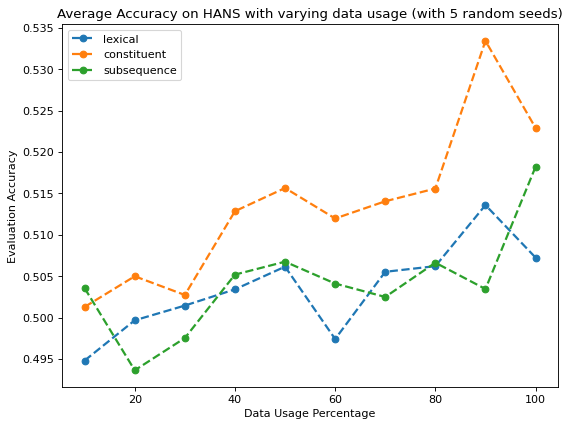

In [15]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(data_pct, lexical_mean_vals, marker='o', 
         linestyle='dashed',linewidth=2, markersize=6, label='lexical')
plt.plot(data_pct, constituent_mean_vals, marker='o', 
         linestyle='dashed',linewidth=2, markersize=6, label='constituent')
plt.plot(data_pct, subsequence_mean_vals, marker='o', 
         linestyle='dashed',linewidth=2, markersize=6, label='subsequence')

plt.xlabel('Data Usage Percentage')
plt.ylabel('Evaluation Accuracy')
plt.title('Average Accuracy on HANS with varying data usage (with 5 random seeds)')
plt.legend()
plt.savefig('/home/nlp/transformers-importance-sampling/figs/avg_acc_hans_seeds_graph.png')
plt.show()

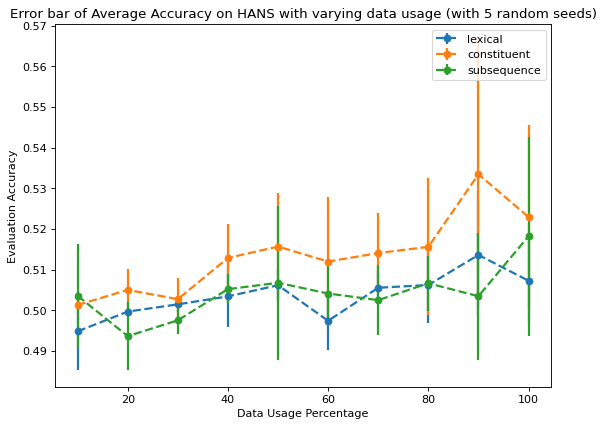

In [16]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar(data_pct, lexical_mean_vals, yerr = lexical_std_vals, marker='o', 
         linestyle='dashed',linewidth=2, markersize=6, label='lexical')
plt.errorbar(data_pct, constituent_mean_vals, yerr= constituent_std_vals, marker='o', 
         linestyle='dashed',linewidth=2, markersize=6, label='constituent')
plt.errorbar(data_pct, subsequence_mean_vals, yerr = subsequence_std_vals, marker='o', 
         linestyle='dashed',linewidth=2, markersize=6, label='subsequence')

plt.xlabel('Data Usage Percentage')
plt.ylabel('Evaluation Accuracy')
plt.title('Error bar of Average Accuracy on HANS with varying data usage (with 5 random seeds)')
plt.legend()
plt.savefig('/home/nlp/transformers-importance-sampling/figs/avg_acc_hans_seeds_error_graph.png')
plt.show()

## Clustering with ALbert-base-v2 (with bug)

In [20]:
x = [2, 4, 8, 16, 32, 64]
clustering_y_mnli = [69.45491, 76.66836, 79.09322, 81.30412,
                    82.72032, 83.84105]
clustering_y_mnli_mm = [70.90113, 77.96989, 80.37021,
                       82.09926, 83.451993, 84.63181]
random_subsampling_y_mnli = [70.91186, 76.73968, 78.75700,
                             81.16148, 82.00713, 84.31991]
random_subsampling_y_mnli_mm = [72.34540, 78.55980, 80.17697,
                               81.79414, 82.42473, 85.23189]

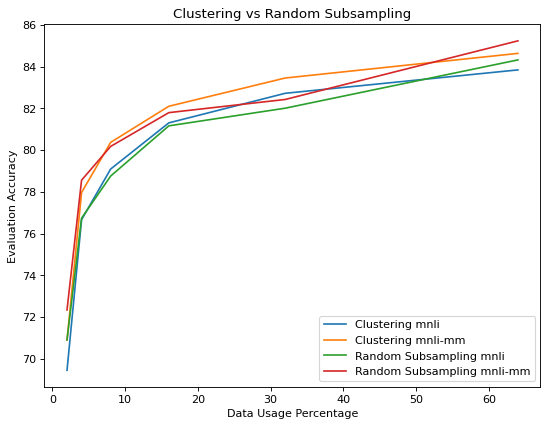

In [21]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, clustering_y_mnli, label = "Clustering mnli")
plt.plot(x, clustering_y_mnli_mm, label = "Clustering mnli-mm")
plt.plot(x, random_subsampling_y_mnli, label = "Random Subsampling mnli")
plt.plot(x, random_subsampling_y_mnli_mm, label = "Random Subsampling mnli-mm")
plt.legend()
plt.xlabel('Data Usage Percentage')
plt.ylabel('Evaluation Accuracy')
plt.title("Clustering vs Random Subsampling")
plt.savefig('/home/nlp/transformers-importance-sampling/figs/clustering_vs_random_albert_v2.png')
plt.show()

## Training more on 2% data

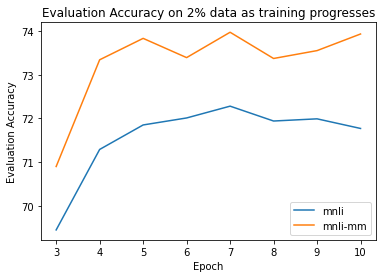

In [22]:
x = [3, 4, 5, 6, 7, 8, 9, 10]
y_mnli_2_pct = [69.45, 71.29, 71.85, 72.01, 72.28,  71.94, 71.99, 71.77]
y_mnli_mm_2_pct = [70.90, 73.34, 73.83, 73.39, 73.97, 73.37, 73.55, 73.93]
plt.plot(x, y_mnli_2_pct, label = 'mnli')
plt.plot(x, y_mnli_mm_2_pct, label = 'mnli-mm')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Evaluation Accuracy')
plt.title("Evaluation Accuracy on 2% data as training progresses")
plt.savefig('/home/nlp/transformers-importance-sampling/figs/2_pct_data_eval_acc_epoch.png')
plt.show()

## With clusters

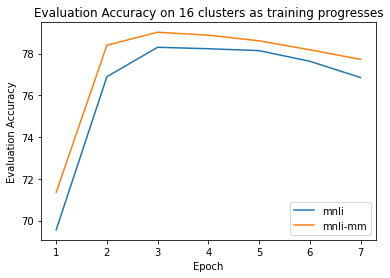

In [23]:
x = [1, 2, 3, 4, 5, 6, 7]
y_16_clusters_mnli = [69.55, 76.89, 78.30, 78.23, 78.14, 77.63, 76.85]
y_16_clusters_mnli_mm = [71.35, 78.40, 79.02, 78.88, 78.61, 78.18, 77.72]
plt.plot(x, y_16_clusters_mnli, label = 'mnli')
plt.plot(x, y_16_clusters_mnli_mm, label = 'mnli-mm')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Evaluation Accuracy')
plt.title("Evaluation Accuracy on 16 clusters as training progresses")
plt.savefig('/home/nlp/transformers-importance-sampling/figs/16_clusters_epoch_acc.png')
plt.show()

# Clustering - 512 centroids only (MiniBatchKMeans)

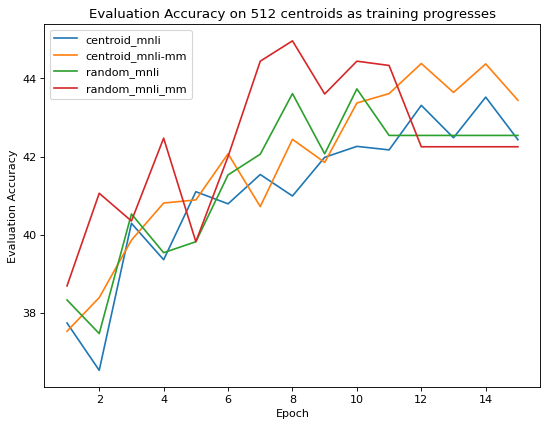

In [30]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
y_centroids_mnli = [37.74, 36.53, 40.29, 39.36, 41.10, 40.79, 
                    41.54, 40.99, 41.98, 42.26, 42.17, 43.31, 
                    42.48, 43.52, 42.43]
y_centroids_mnli_mm = [37.53, 38.39, 39.86, 40.81, 40.89, 
                       42.07, 40.72, 42.44, 41.85, 43.37, 
                       43.61, 44.38, 43.64, 44.37, 43.44]

y_random_mnli = [38.33, 37.47, 40.53, 39.54, 39.82,
                         41.53, 42.06, 43.61, 42.07, 43.73,
                         42.54, 42.54, 42.54, 42.54, 42.54]

y_random_mnli_mm = [38.69, 41.06, 40.35, 42.47, 39.82,
                            42.00, 44.44, 44.96, 43.60, 44.44,
                            44.33, 42.25, 42.25, 42.25, 42.25]

x = list(range(1, len(y_centroids_mnli)+1))
plt.plot(x, y_centroids_mnli, label = 'centroid_mnli')
plt.plot(x, y_centroids_mnli_mm, label = 'centroid_mnli-mm')
plt.plot(x, y_random_mnli, label = 'random_mnli')
plt.plot(x, y_random_mnli_mm, label = 'random_mnli_mm')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Evaluation Accuracy')
plt.title("Evaluation Accuracy on 512 centroids as training progresses")
plt.savefig('/home/nlp/transformers-importance-sampling/figs/512_centroids_epoch_acc.png')
plt.show()

## Meta Learning

In [9]:
df = pd.read_csv('/home/nlp/experiments/meta/results.csv')

In [11]:
del df['Unnamed: 0']

In [15]:
for column in df.columns:
    for idx in range(len(df[column])):
        df[column].values[idx] = ast.literal_eval(df[column].values[idx])

In [16]:
len(df['mrpc'].values[0])

51

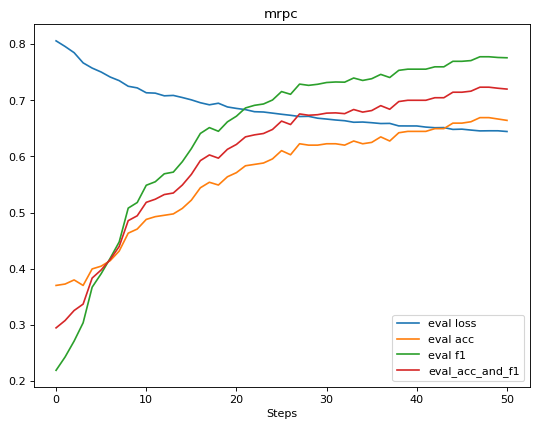

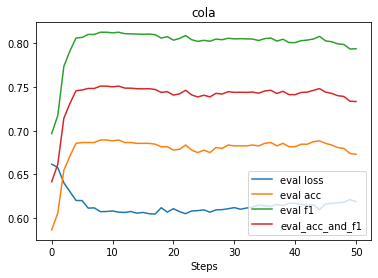

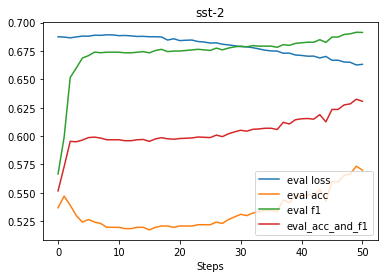

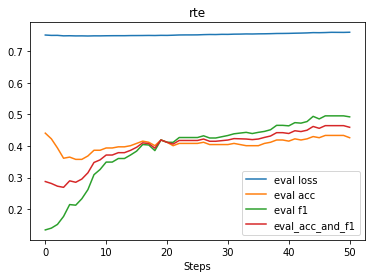

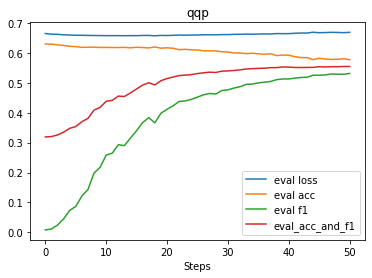

In [18]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

for column in df.columns:
    x = range(len(df[column].values[0]))
    
    eval_loss = df[column].values[0]
    eval_acc = df[column].values[1]
    eval_f1 = df[column].values[2]
    eval_acc_and_f1 = df[column].values[3]

    plt.plot(x, eval_loss, label = 'eval loss')
    plt.plot(x,  eval_acc, label = 'eval acc')
    plt.plot(x, eval_f1, label = 'eval f1')
    plt.plot(x, eval_acc_and_f1, label = 'eval_acc_and_f1')
    plt.legend()
    plt.xlabel('Steps')
    # plt.ylabel('Evaluation Accuracy')
    plt.title(column)
    #plt.savefig('/home/nlp/transformers-importance-sampling/figs/512_centroids_epoch_acc.png')
    plt.show()

### NLI tasks

In [11]:
df = pd.read_csv('/home/nlp/experiments/meta_2/results_2.csv')
del df['Unnamed: 0']

In [12]:
for column in df.columns:
    for idx in range(len(df[column])):
        df[column].values[idx] = ast.literal_eval(df[column].values[idx])

In [9]:
df

,Unnamed: 0,qnli,wnli
0,eval_loss,"[0.6634743014971415, 0.6490455667177836, 0.638...","[0.6987736821174622, 0.7011032104492188, 0.701..."
1,eval_acc,"[0.5623283909939594, 0.6337177375068643, 0.673...","[0.5211267605633803, 0.4507042253521127, 0.380..."
2,eval_f1,[],[]
3,eval_acc_and_f1,[],[]


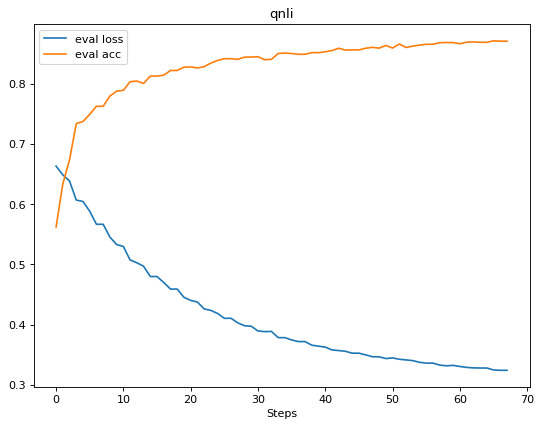

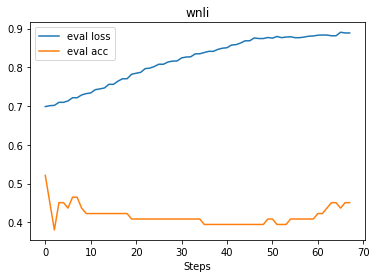

In [13]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

for column in df.columns:
    x = range(len(df[column].values[0]))
    
    eval_loss = df[column].values[0]
    eval_acc = df[column].values[1]
    #eval_f1 = df[column].values[2]
    #eval_acc_and_f1 = df[column].values[3]

    plt.plot(x, eval_loss, label = 'eval loss')
    plt.plot(x,  eval_acc, label = 'eval acc')
    #plt.plot(x, eval_f1, label = 'eval f1')
    #plt.plot(x, eval_acc_and_f1, label = 'eval_acc_and_f1')
    plt.legend()
    plt.xlabel('Steps')
    # plt.ylabel('Evaluation Accuracy')
    plt.title(column)
    #plt.savefig('/home/nlp/transformers-importance-sampling/figs/512_centroids_epoch_acc.png')
    plt.show()

## MNLI/HANS Meta Learning

In [55]:
df = pd.read_csv('/home/nlp/experiments/meta_2/mnli_hans.csv')
del df['Unnamed: 0']

In [56]:
for column in df.columns:
    for idx in range(len(df[column])):
        df[column].values[idx] = ast.literal_eval(df[column].values[idx])

In [57]:
df.columns

Index(['mnli', 'hans', 'mnli-mm'], dtype='object')

In [58]:
df['mnli-mm'].values[4]

[0.3187550854353133,
 0.3184499593165175,
 0.31814483319772174,
 0.3818144833197722,
 0.37652563059397887,
 0.403173311635476,
 0.455553295362083,
 0.5544141578519122,
 0.5806550040683482,
 0.6774816924328723,
 0.7078925956061839,
 0.7355573637103336,
 0.7561025223759154,
 0.7772579332790887,
 0.7917005695687551,
 0.7977013832384052]

In [59]:
[2**i for i in range(1, 18)][:11]

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]


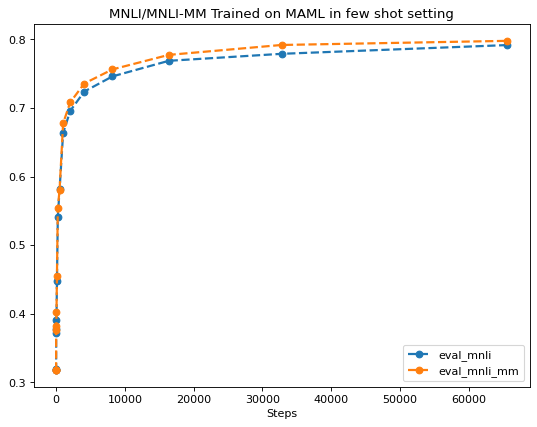

In [62]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

columns = ['mnli', 'mnli-mm']
x = [2**i for i in range(1, 17)]
print(x)

eval_loss = df[column].values[0]
eval_acc = df[column].values[1]
eval_f1 = df[column].values[2]
eval_acc_and_f1 = df[column].values[3]
eval_acc_mnli = df[columns[0]].values[4]
eval_acc_mnli_mm = df[columns[1]].values[4]


#plt.plot(x, eval_loss, label = 'eval loss')
#plt.plot(x,  eval_acc, label = 'eval acc')
#plt.plot(x, eval_f1, label = 'eval f1')
#plt.plot(x, eval_acc_and_f1, label = 'eval_acc_and_f1')
plt.plot(x, eval_acc_mnli, label = 'eval_mnli', marker='o', 
         linestyle='dashed',linewidth=2, markersize=6)
plt.plot(x, eval_acc_mnli_mm, label = 'eval_mnli_mm', marker='o', 
         linestyle='dashed',linewidth=2, markersize=6)

plt.legend()
plt.xlabel('Steps')
# plt.ylabel('Evaluation Accuracy')
plt.title('MNLI/MNLI-MM Trained on MAML in few shot setting')
#plt.savefig('/home/nlp/transformers-importance-sampling/figs/512_centroids_epoch_acc.png')
plt.show()

In [69]:
hans_prediction_file_names = []
for string in os.listdir('/home/nlp/experiments/meta_2/'):
    if string.startswith('hans'):
        hans_prediction_file_names.append(string)

In [70]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [71]:
hans_prediction_file_names.sort(key=natural_keys)

In [72]:
hans_prediction_file_path = []
for string in hans_prediction_file_names:
    hans_prediction_file_path.append(os.path.join(
    '/home','nlp','experiments','meta_2', string                                
    ))

In [73]:
hans_evaluation_set_file_path = os.path.join('/home', 'nlp', 'data', 'glue_data', 'hans', 
                                            'heuristics_evaluation_set.txt')
correct_dict, heuristic_list, subcase_list, template_list = process_actual_preds(hans_evaluation_set_file_path)

In [74]:
hans_ent, hans_non_ent = get_hans_preds_main(hans_evaluation_set_file_path, hans_prediction_file_path)

100%|██████████| 16/16 [00:02<00:00,  6.65it/s]


In [75]:
hans_ent['/home/nlp/experiments/meta_2/hans_predictions_1.txt']

{'lexical_overlap': 0.0, 'subsequence': 0.0, 'constituent': 0.0}

In [76]:
columns = ['entailed_lo', 'entailed_sub', 'entailed_cons',
           'non_entailed_lo', 'non_entailed_sub', 'non_entailed_cons']

In [77]:
hans_df = pd.DataFrame(columns=columns)

In [78]:
hans_data = {}
for idx in trange(len(hans_prediction_file_path)):
    file_name = hans_prediction_file_path[idx]
    num_val = hans_prediction_file_path[idx].split('/')[-1]
    num_val = int(''.join(list(filter(str.isdigit, num_val)))) 
    hans_data[num_val] = {'entailed': hans_ent[file_name],
                    'non_entailed': hans_non_ent[file_name]}

100%|██████████| 16/16 [00:00<00:00, 22221.48it/s]


In [79]:
for idx, data in hans_data.items():
    print(idx, data)
    break

1 {'entailed': {'lexical_overlap': 0.0, 'subsequence': 0.0, 'constituent': 0.0}, 'non_entailed': {'lexical_overlap': 1.0, 'subsequence': 1.0, 'constituent': 1.0}}


In [80]:
hans_data.keys()

dict_keys([1, 3, 7, 15, 31, 63, 127, 255, 511, 1023, 2047, 4095, 8191, 16383, 32767, 65535])

In [81]:
x = list(hans_data.keys())
x = list(map(int, x))

ent_lo, ent_sub, ent_cons = [], [], []
non_ent_lo, non_ent_sub, non_ent_cons = [], [], []
for idx, data in hans_data.items():
    ent_lo.append(data['entailed']['lexical_overlap'])
    ent_sub.append(data['entailed']['subsequence'])
    ent_cons.append(data['entailed']['constituent'])
    non_ent_lo.append(data['non_entailed']['lexical_overlap'])
    non_ent_sub.append(data['non_entailed']['subsequence'])
    non_ent_cons.append(data['non_entailed']['constituent'])
    
    ent_lo = list(map(float, ent_lo))
    ent_sub = list(map(float, ent_sub))
    ent_cons = list(map(float, ent_cons))
    non_ent_lo = list(map(float, non_ent_lo))
    non_ent_sub = list(map(float, non_ent_sub))
    non_ent_cons = list(list(map(float, non_ent_cons)))


In [82]:
ent_lo, ent_sub, ent_cons = np.array(ent_lo), np.array(ent_sub), np.array(ent_cons)
non_ent_lo, non_ent_sub, non_ent_cons = np.array(non_ent_lo), np.array(non_ent_sub), np.array(non_ent_cons)

In [83]:
avg_lo = (ent_lo+non_ent_lo)/2
avg_sub = (ent_sub+non_ent_sub)/2
avg_cons = (ent_cons+non_ent_cons)/2

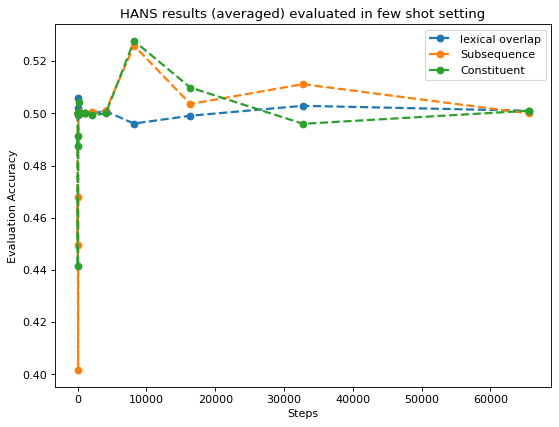

In [84]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x, avg_lo, label='lexical overlap', marker='o', 
         linestyle='dashed',linewidth=2, markersize=6)
plt.plot(x, avg_sub, label='Subsequence', marker='o', 
         linestyle='dashed',linewidth=2, markersize=6)
plt.plot(x, avg_cons, label='Constituent', marker='o', 
         linestyle='dashed',linewidth=2, markersize=6)


plt.xlabel('Steps')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('HANS results (averaged) evaluated in few shot setting')
#plt.savefig('/home/nlp/transformers-importance-sampling/figs/512_centroids_epoch_acc.png')
plt.show()

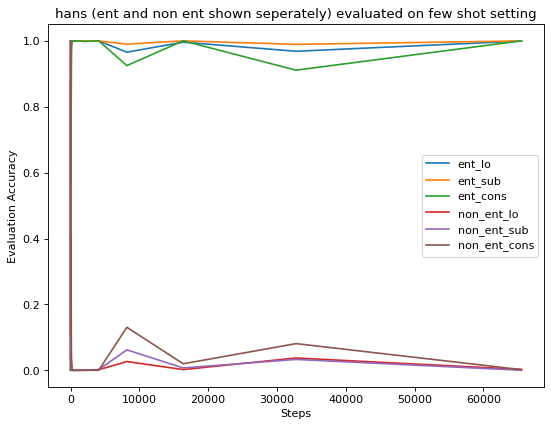

In [64]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, ent_lo, label='ent_lo')
plt.plot(x, ent_sub, label='ent_sub')
plt.plot(x, ent_cons, label='ent_cons')

plt.plot(x, non_ent_lo, label='non_ent_lo')
plt.plot(x, non_ent_sub, label='non_ent_sub')
plt.plot(x, non_ent_cons, label='non_ent_cons')
plt.xlabel('Steps')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('hans (ent and non ent shown seperately) evaluated on few shot setting')
#plt.savefig('/home/nlp/transformers-importance-sampling/figs/512_centroids_epoch_acc.png')
plt.show()

In [66]:
non_ent_lo

array([1.000e+00, 1.000e+00, 1.000e+00, 1.634e-01, 3.100e-02, 1.204e-01,
       6.000e-04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.800e-03,
       2.660e-02, 2.200e-03, 3.740e-02, 2.600e-03])

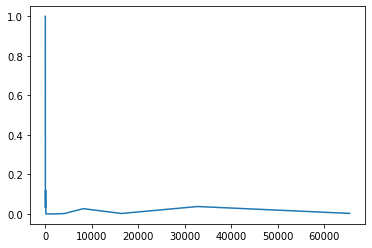

In [68]:
plt.plot(x, non_ent_lo)

## Siamese

In [13]:
mnli = [31.788, 57.36, 58.42, 58.27, 57.67]
mnli_mm = [32.78, 57.54, 58.49, 58.34, 57.8]

hans_lo_ent = np.array([0.00, 63.36, 62.48, 58.34, 56.9])
hans_sub_ent = np.array([0.00, 72.42, 70.76, 67.52, 66.1])
hans_cons_ent = np.array([0.00, 68.92, 69.14, 66.46, 64.2])

hans_lo_non_ent = np.array([99.96, 37.3, 37.58, 41.5, 42.84])
hans_sub_non_ent = np.array([99.92, 38.74, 38.96, 40.4, 40.4])
hans_cons_non_ent = np.array([99.88, 31.24, 30.9, 33.3, 34.88])


hans_lo_avg = (hans_lo_ent + hans_lo_non_ent)/2
hans_sub_avg = (hans_sub_ent+hans_sub_non_ent)/2
hans_cons_avg = (hans_cons_ent+hans_cons_non_ent)/2

x = [0, 1, 2, 3, 4]

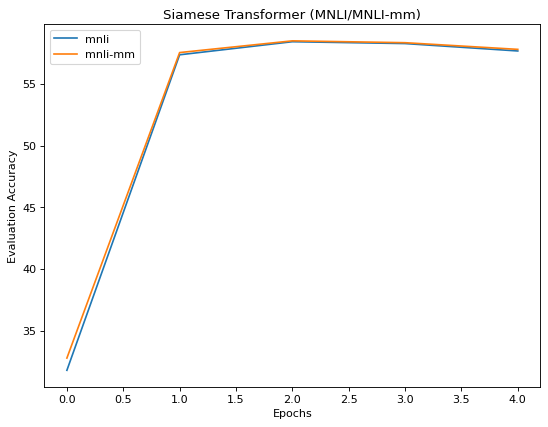

In [8]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, mnli, label='mnli')
plt.plot(x, mnli_mm, label='mnli-mm')

plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('Siamese Transformer (MNLI/MNLI-mm)')
#plt.savefig('/home/nlp/transformers-importance-sampling/figs/512_centroids_epoch_acc.png')
plt.show()

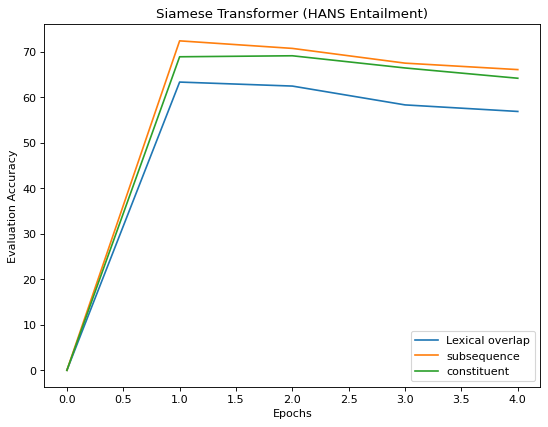

In [14]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, hans_lo_ent, label='Lexical overlap')
plt.plot(x, hans_sub_ent, label='subsequence')
plt.plot(x, hans_cons_ent, label='constituent')

plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('Siamese Transformer (HANS Entailment)')
#plt.savefig('/home/nlp/transformers-importance-sampling/figs/512_centroids_epoch_acc.png')
plt.show()

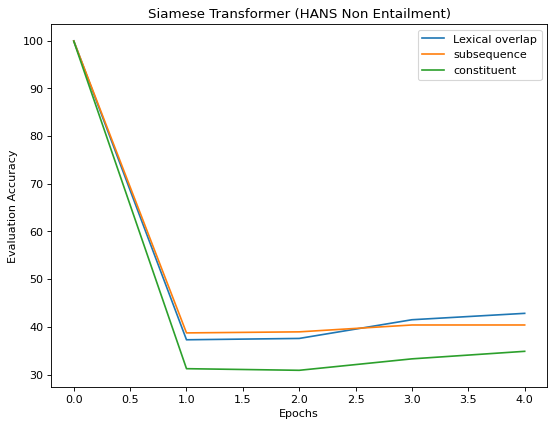

In [15]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, hans_lo_non_ent, label='Lexical overlap')
plt.plot(x, hans_sub_non_ent, label='subsequence')
plt.plot(x, hans_cons_non_ent, label='constituent')

plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('Siamese Transformer (HANS Non Entailment)')
#plt.savefig('/home/nlp/transformers-importance-sampling/figs/512_centroids_epoch_acc.png')
plt.show()

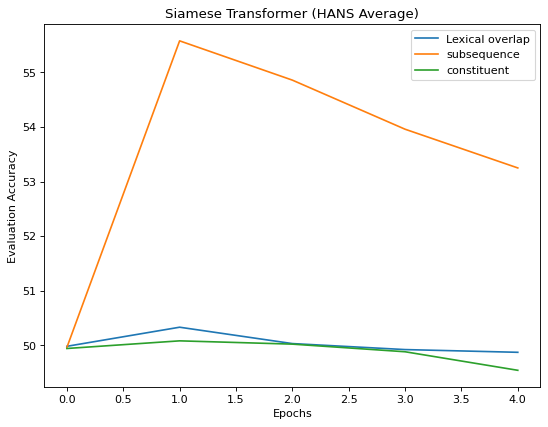

In [16]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, hans_lo_avg, label='Lexical overlap')
plt.plot(x, hans_sub_avg, label='subsequence')
plt.plot(x, hans_cons_avg, label='constituent')

plt.xlabel('Epochs')
plt.ylabel('Evaluation Accuracy')
plt.legend()
plt.title('Siamese Transformer (HANS Average)')
#plt.savefig('/home/nlp/transformers-importance-sampling/figs/512_centroids_epoch_acc.png')
plt.show()